# 2. házi feladat

A második házi feladat során egy egyszerű Multi-layer Perceptron (MLP) típusú neuronhálót kell betanítani és kiértékelni egy regressziós és egy klasszifikációs feladaton a Keras könyvtár segítségével. 

A házi feladat több részfeladatból áll (A - I), melyek egymásra épülnek. Az A, B, C, D, F és H részfeladatokból több változat van, ezekből mindenkinek egyet-egyet kell megoldania. **Arról, hogy ki melyiket oldja meg, az alábbi linken található lista ad tájékoztatást** Neptun-kód - feladatok listája formában:

http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/annbsc21_p1_hw2_assignments.txt 

Az E, G, I részfeladatok esetében mindenkinek ugyanazt kell megoldania.

A feladat automatikus tesztelőszkripttel rendelkezik. Éppen ezért, **ne változtasd meg a notebook struktúráját**, ne szedd több részre, illetve ne módosítsd a megírt részeket, csak a megoldásaidat írd be a megfelelő helyre, különben nem fogjuk tudni értékelni. A megoldások az `# Implement your solution BELOW` és `# Implement your solution ABOVE` sorok közé írandók. Ha a megoldott részfeladatok futtatásakor az "Tester: .... OK" felirat megjelenik, _feltehetően_ jó a megoldás. A beadott házi feladatok plágium ellenőrzésen esnek át. Másolás gyanújának felmerülése esetén mind a másolat(ok), mind az azt/azokat ihlető eredeti megoldások visszautasíthatók.

**!!! A feladatok megoldását, vagy az arra mutató linkeket bárhol közzétenni tilos !!!**

Elakadás esetén a Canvas fórumon kérhető és nyújtható segítség, de legfeljebb olyan jellegű válasz adható hallgatói részről, hogy melyik függvényt érdemes megpróbálni, vagy például egy hasonló példához hogyan kellene a tömböt indexelni. **Akár kérdésben, akár válaszban a megoldás jelentős részét tartalmazó kódrészletet közzétenni tilos.**

**Megoldás és beküldés menete:**

A közzétett, feladatokat tartalmazó Google Colab notebook csak "view" jogosultságokkal van megosztva, így, bár a notebook szerkeszthetőnek látszik, az úgynevezett "Playground" módban nyílik meg, ahol a változtatások nem lesznek mentve. Mindenkinek le kell másolnia a saját Drive-jára a notebook-ot (Google Colab file menü -> Save a copy to Drive): a másolat már maradandóan szerkeszthető és futtatható lesz. **A kész megoldást tartalmazó notebook-ot le kell tölteni**  (Google Colab file menü -> Download .ipynb), **majd a Canvas-ban, a kiírt feladatnál feltölteni.** Link nem adható be, csak az .ipynb fájl. Alternatívaként, Google Colab helyett saját gépen futó Python-nal és Jupyter-rel is szerkeszthetők és futtathatók .ipynb notebookok.

**Első határidő:** 2021. április 28., szerda, 23:59.

**Végső határidő:** 2021. május 10., hétfő, 23:59. - **!!! A végső határidőig mindenkinek az oktatók által elfogadható, beadott megoldással kell rendelkeznie, ezt követően pótlásra és/vagy javításra nincs lehetőség. !!!**

**Pontozás:** A házi feladat helyes megoldása feltétele a jegyszerzésnek. Az, aki az első határidőig teljes, legfeljebb apró hibákat tartalmazó megoldást adott be, 2 extra pontot kap.

**Kikötés:** Ahol csak lehet, hatékony megoldásokat várunk.



Tesztelő szkript letöltése, importok.

In [ ]:
# Download tester
!rm tester.py
!wget http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/tester.py 

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.layers
import tensorflow.keras.activations
import tensorflow.keras.callbacks

import matplotlib.pyplot as plt

# import tester after importing tensorflow, to make sure correct tf version is imported
from tester import Tester


--2021-04-26 22:59:27--  http://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/tester.py
Resolving nipg12.inf.elte.hu (nipg12.inf.elte.hu)... 157.181.160.172
Connecting to nipg12.inf.elte.hu (nipg12.inf.elte.hu)|157.181.160.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41348 (40K) [text/plain]
Saving to: ‘tester.py’

tester.py           100%[===================>]  40.38K  --.-KB/s    in 0.1s    

2021-04-26 22:59:27 (340 KB/s) - ‘tester.py’ saved [41348/41348]



###**A**: Az adatbázis letöltése

**A/1 - A/6**: A tesztelőszkript a számodra szükséges adatbázist tölti le és a részedre kiosztott feladatok helyességét fogja tesztelni. Ehhez az alábbi kódblokk tetején, a Tester példányosításakor paraméterként a Neptun-kódodat kell megadni egy sztringként, pl: 
`tester = Tester('DK7UAQ')`

**Információ az adatbázisokról**:
Az adatbázisok a UCI Machine Learning Repository-ról származnak.
- **A/1**: Különböző vegyületekre (a vegyületek tulajdonságai alapján) próbáljuk megbecsülni azt a mennyiséget, ami az esetek 50%-ában megöli a _Pimephales promelas_ fajtájú halat. http://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity
- **A/2**: Két portugál középiskolában a tanulók évvégi matematika jegyét (0-20) próbáljuk megbecsülni a tanulók szociális és pénzügyi háttere alapján. http://archive.ics.uci.edu/ml/datasets/Student+Performance 
- **A/3**: Lásd A/2, matematika helyett portugál nyelv tárgyból.
- **A/4**: Lásd A/2. Az A/2. és A/3.-ban használt adatbázisok esetében az input változók közt megtalálhatók a tanulók első- és második harmadévvégi osztályzata az adott tárgyból. Ezekkel nyilvánvalóan erősen korrelál az év végi jegy, így nehezíti a feladatot, ha ezeket az input változókat elhagyjuk. Az A/4 és A/5. adatbázisaiból ezek a változók hiányoznak, így jelentősen gyengébb eredmény várható.
- **A/5**: Lásd A/4, matematika helyett portugál nyelv tárgyból.
- **A/6**: Betontömbök nyomószilárdságát (~1-100 MPa) próbáljuk megbecsülni a betontömbök összetevőinek mennyiségéből, előállítási körülményeikből és korukból. http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

A tesztelőszkript letölti a szöveges formában tárolt adatbázist és elhelyezi a `content` sztringben. Alább, kiírjuk a hosszát és az első 500 karaktert is a sztringből. Az adatbázis fájlok egy-egy sora adja meg az egy-egy mintaelemhez tartozó adatokat, ahol az utolsó érték a címke, míg a többi érték az input változók értékeit kódolja. Az adatbázis első sora a változók neveit tartalmazza.

A feladatod, hogy alakítsd át a `content` sztringet az adatbázis input változóit és címkéit tartalmazó tömbbé. A tömbök típusa np.float32 (lebegőpontos) típusú legyen! Az input változók értékeit helyezd el a `features` (n_mintaelem, n_valtozo) alakú tömbben, míg a címkéket a `labels` (n_mintaelem,) alakú tömbben!



In [ ]:
tester = Tester('ENPCTE')
content = tester.get_dataset_content()

print(len(content))
print(content[:500])


25455
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G3
0;0;18;0;1;1;4;4;5;0;4;0;2;2;0;0;1;1;1;0;0;1;1;4;3;4;1;1;3;6;6
0;0;17;0;1;0;1;1;5;3;4;1;1;2;0;1;0;1;1;1;0;0;1;5;3;3;1;1;3;4;6
0;0;15;0;0;0;1;1;5;3;3;0;1;2;3;0;1;0;1;0;0;0;1;4;3;2;2;3;3;10;10
0;0;15;0;1;0;4;2;1;4;0;0;1;3;0;1;0;0;0;0;0;0;0;3;2;2;1;1;5;2;15
0;0;16;0;1;0;3;3;3;3;0;


In [ ]:
# implement your solution BELOW
def preprocess_data(content): 
  lines = content.split('\n')
  print(len(lines))
  lines = lines[1:-1]
  lines = [line.split(';') for line in lines]
  data = [[ float(item) for item in line] for line in lines]
  data = np.array( data, dtype = np.float32 )
  # data.shape = (395, 31)
  features = data[:,0:30]
  labels = data[:,30:31]
  labels = labels.flatten()
  return (features, labels)

features, labels = preprocess_data(content)


# implement your solution ABOVE

tester.test('dataset_shape', features, labels)


397
Tester: Dataset preparation OK


## **B**: Tanító-, validációs- és teszthalmaz szétválasztása

Keverd meg véletlenszerűen a mintaelemeket a `features` és `labels` tömbökben (természetesen a két tömb permutálása legyen azonos)! Ez azért szükséges, mert az adatbázisban az elemek lehet, hogy rendezettek pl. a címkék szerint. Megkeverés nélkül, a szétválasztott halmazokban jelentősen különbözne a címkék eloszlása. 

Ezt követően válaszd szét a tömböket tanító-, validációs- és teszthalmazra!

A szétválasztás történjen az alábbi arányokkal:
- **B/1**.: 70% / 15% / 15%
- **B/2**: 60% / 20% / 20%
- **B/3**: 50% / 25% / 25%

A halmazokat tartalmazó három-három input- és címketömb változókat nevezd el `x_unnorm_train`, `x_unnorm_val`, `x_unnorm_test`, `y_train`, `y_val`, `y_test`-nek sorrendben.

In [ ]:
# implement your solution BELOW
def separate_data(features, labels, train_part, val_part):
  p = np.random.permutation(features.shape[0])
  features = features[p]
  labels = labels[p]

  section_train = int(features.shape[0] * train_part)
  section_val = section_train + int(features.shape[0] * val_part)

  

  x_unnorm_train = features[:section_train]
  x_unnorm_val = features[section_train:section_val]
  x_unnorm_test = features[section_val:]
  y_train = labels[:section_train]
  y_val = labels[section_train:section_val]
  y_test = labels[section_val:]

  print("len of train | val | test: " + str(y_train.shape[0]) + " | " + str(y_val.shape[0]) + " | " + str(y_test.shape[0]))
  return x_unnorm_train, x_unnorm_val, x_unnorm_test, y_train, y_val, y_test

x_unnorm_train, x_unnorm_val, x_unnorm_test, y_train, y_val, y_test = separate_data(features, labels, 0.8, 0.1)

# implement your solution ABOVE

tester.test('dataset_split', x_unnorm_train, x_unnorm_val, x_unnorm_test,\
                             y_train, y_val, y_test)


len of train | val | test: 316 | 39 | 40


AssertionError: ignored

## **C**: Az input változók azonos nagyságrendre hozása

A változók azonos nagyságrendre hozása az alábbi technikával történjen:
- **C/1**: sztenderdizáció (0 átlag, 1 szórás)
- **C/2**: min-max skálázás (0 minimum, 1 maximum)

A változókat egymástól függetlenül kell skálázni. A skálázáshoz szükséges átlagot és szórást / minimumot és maximumot a tanítóhalmazon számold ki, majd alkalmazd őket a validációs és a teszt halmazra. Ez azért szükséges, mert a teszthalmazról azt feltételezzük, hogy ismeretlen a betanítás során, pontosan azért, hogy semmi esetre se tudjuk hozzáigazítani a tanított modellünket. 

**A feladatot *NumPy* segítségével kell megoldani. Ennek a részfeladatnak a megoldásához nem megengedett a *Keras* és a *TensorFlow* könyvtárnak és azok almoduljainak használata.**

A skálázott halmazokat tartalmazó három változót nevezd el `x_train`, `x_val`, `x_test`-nek sorrendben!

In [ ]:
# implement your solution BELOW
def normalize_input_features(x_unnorm_train, x_unnorm_val, x_unnorm_test):
  train_min = np.min(x_unnorm_train, 0)
  train_max = np.max(x_unnorm_train, 0)


  x_train = np.divide(np.subtract(x_unnorm_train,train_min),np.subtract(train_max,train_min))
  x_val = np.divide(np.subtract(x_unnorm_val,train_min),np.subtract(train_max,train_min))
  x_test = np.divide(np.subtract(x_unnorm_test,train_min),np.subtract(train_max,train_min))

  return x_train, x_val, x_test

x_train, x_val, x_test = normalize_input_features(x_unnorm_train, x_unnorm_val, x_unnorm_test)
# implement your solution ABOVE

tester.test('dataset_rescale', x_train, x_val, x_test)


Tester: Feature rescale OK


## **D**: A regressziós neuronháló definiálása Keras-ban 

Használd a `keras.models.Sequential()` osztályt a háló definiálásához! A háló architektúráját az alábbiak alapján alakítsd ki:
- **D/1**: Kétrétegű háló, az első réteg neuronjainak száma 50, aktivációs függvénye ReLU. Az első réteg után alkalmazz dropout-ot neurononként 30%-os valószínűséggel!
- **D/2**: Négyrétegű háló, a neuronok száma rendre 20, 20, 10, aktivációs függvényük ReLU. Az egyes rétegek közé tégy dropout rétegeket, melyek 20%-os valószínűséggel nulláznak ki egy-egy elemet!
- **D/3**: Háromrétegű háló, a neuronok száma rendre 50, 30. Aktivációs függvényként használj sorban tanh-t, majd ReLU-t!

Minden esetben csak teljesen összekötött (dense) rétegeket, valamint dropout rétegeket kell használnod. Az aktivációs függvényeket a teljesen összekötött rétegek `activation` paramétereként add meg (azaz most ne használj külön Acitvation rétegeket). A rétegek számába beleértendő a kimenetre képző, utolsó réteg is, melynek méretét a címke mérete határozza meg. Alkalmazd a tanult aktivációs függvényt az utolsó rétegen, függően a feladat típusától.
A modellt fordítsd le a `compile()` függvény segítségével: a költségfüggvény legyen a szokásos, regresszióhoz használatos átlagos négyzetes eltérés (MSE), optimizer algoritmusként pedig alkalmazd az SGD algoritmust megfelelő tanulási rátával! 
A regressziós neuronhálót tartalmazó keras.models.Sequential() típusú változót nevezd el `reg_model`-nek!

In [ ]:
# implement your solution BELOW
def make_reg_model():
  reg_model = tf.keras.models.Sequential()
  reg_model.add(tf.keras.layers.Dense(50, activation='relu', input_dim = x_train.shape[1]))
  reg_model.add(tf.keras.layers.Dropout(0.3))
  reg_model.add(tf.keras.layers.Dense(1))


  reg_model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.MSE, metrics=['mae'])
  return reg_model
reg_model = make_reg_model()
reg_model.summary()

# implement your solution ABOVE

tester.test('reg_model_architecture', reg_model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                1550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
Tester: Regression model architecture OK


## **E**: A háló betanítása regressziós feladatra

Tanítsd be a neuronhálót a tanítóhalmazon! Használj early stopping-ot a validációs halmazzal! A tanulási rátát, epoch-ok maximális számát, a batch méretet, az early stopping `patience` paraméterét szabadon átállíthatod. Próbálgathatsz különböző kombinációkat, hogy jobb eredményt érj el.

- Rajzold ki, hogyan alakult a tanulási és validációs költség a betanítás során! Ehhez használhatod a `matplotlib` könyvtárat, példát találsz a 8. előadás notebookjában. 
- A négyzetes (MSE) költség mellett az átlagos abszolút hiba (Mean Absolute Error, MAE) tanító- és validációs halmazon történő alakulását is rajzold ki egy másik grafikonon! A grafikonok y tengelyének megjelenített értékhatárait úgy állítsd be, hogy mindegyik idősor látható legyen és könnyen ki lehessen venni a költségek alakulását a tanítás vége felé is!
- Számold ki a betanított modell négyzetes hibáját és az átlagos abszolút hibát a teszthalamzon, majd add értékül ezeket az értékeket a `test_mse` és `test_mae` változóknak!
- Válassz néhány példát a teszthalmazból és becsülj hozzájuk címkét a betanított modellel, majd írasd ki a becsült és a megfelelő helyes címkéket! Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.



Epoch 1/400
20/20 - 1s - loss: 82.8636 - mae: 8.2976 - val_loss: 41.9797 - val_mae: 5.9748
Epoch 2/400
20/20 - 0s - loss: 32.3486 - mae: 4.6806 - val_loss: 21.2483 - val_mae: 3.7839
Epoch 3/400
20/20 - 0s - loss: 28.6223 - mae: 4.2011 - val_loss: 20.7031 - val_mae: 3.7217
Epoch 4/400
20/20 - 0s - loss: 26.6377 - mae: 4.0225 - val_loss: 19.9347 - val_mae: 3.6179
Epoch 5/400
20/20 - 0s - loss: 26.9116 - mae: 4.0491 - val_loss: 19.3484 - val_mae: 3.5337
Epoch 6/400
20/20 - 0s - loss: 25.2687 - mae: 3.9199 - val_loss: 19.2937 - val_mae: 3.5369
Epoch 7/400
20/20 - 0s - loss: 24.9155 - mae: 3.8997 - val_loss: 18.8911 - val_mae: 3.4819
Epoch 8/400
20/20 - 0s - loss: 23.5328 - mae: 3.7506 - val_loss: 18.6055 - val_mae: 3.4395
Epoch 9/400
20/20 - 0s - loss: 25.4093 - mae: 4.0133 - val_loss: 18.3722 - val_mae: 3.4025
Epoch 10/400
20/20 - 0s - loss: 21.6795 - mae: 3.6932 - val_loss: 18.1437 - val_mae: 3.3631
Epoch 11/400
20/20 - 0s - loss: 23.3642 - mae: 3.7472 - val_loss: 18.1617 - val_mae: 3.38

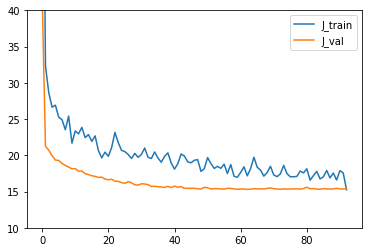

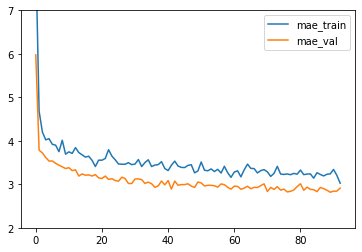

In [ ]:
# implement your solution BELOW

earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 30)
history = reg_model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val) , batch_size=16, \
                        epochs=400, verbose=2, callbacks = [earlystopping_callback])

tr_losses = history.history['loss']
val_losses = history.history['val_loss']

tr_mae = history.history['mae']
val_mae = history.history['val_mae']

fig, ax = plt.subplots()

ax.plot(tr_losses, label = "J_train")
ax.plot(val_losses, label = "J_val")
ax.set_ybound(10,40)
ax.legend()


fig, ax = plt.subplots()
ax.plot(tr_mae, label = "mae_train")
ax.plot(val_mae, label = "mae_val")
ax.set_ybound(2,7)
ax.legend()
fig.show()

e_history = reg_model.evaluate(x_test, y_test, return_dict=True)

e_history.keys()
test_mse = e_history['loss']
test_mae= e_history['mae']


test_predicted = reg_model.predict(x_test)

for i in range(10):
  print("predicted: " + str(test_predicted[i]) + "   true: " + str(y_test[i]))
# implement your solution ABOVE

tester.test('reg_model_learning', test_mse, test_mae)

## **F**: A regressziós adatbázis átalakítása klasszifikációs adatbázissá

Alakítsd át a regressziós adatbázist, hogy alkalmas legyen 
klasszifikációs feladathoz! A kategóriákat az alábbiak alapján alakítsd ki : 

*   **F/1**: 3 kategória. A kategóriákat úgy alakítsd ki, hogy a regressziós adatbázis címkéinek intervallumán felveszel két küszöbértéket. Az első kategóriába a kisebb küszöbérték alatti, a másodikba a két küszöbérték közti és a harmadikba a nagyobb küszöbérték feletti címkével rendelkező mintaelemek kerüljenek. 
Tehát, például ha a regressziós adatbázis címkéi 3 és 8 közt vannak, akkor a két küszöbértéknek választhatjuk az 5.2-t és a 6.1-et. Ekkor az 1. kategóriába az 5.2-nél kisebb címkéjű elemek, a 2. kategóriába az 5.2 és 6.1 közti címkéjű elemek és a 3. kategóriába a 6.1-nél nagyobb címkéjű elemek kerülnek. Azonos címkéjű elemek mindenképpen azonos kategóriába kell, hogy kerüljenek.

*   **F/2**: 4 kategória. A kategóriákat úgy alakítsd ki, hogy a regressziós adatbázis címkéinek intervallumán felveszel három küszöbértéket. Az első kategóriába a kisebb küszöbérték alatti, a másodikba az első és második küszöbérték közti, a harmadikba a második és a haramdik küszöbérték közti, és a negyedikbe a harmadik küszöbérték feletti címkével rendelkező mintaelemek kerüljenek. 
Tehát, például ha a regressziós adatbázis címkéi 3 és 8 közt vannak, akkor a három küszöbértéknek választhatjuk a 3.8-at, a 6.1-et és a 7.5-öt. Ekkor az 1. kategóriába az 3.8-nál kisebb címkéjű elemek, a 2. kategóriába az 3.8 és 6.1 közti címkéjű elemek, a 3. kategóriába az 6.1 és 7.5 közti címkéjű elemek és a 4. kategóriába a 7.5-nél nagyobb címkéjű elemek kerülnek. Azonos címkéjű elemek mindenképpen azonos kategóriába kell, hogy kerüljenek.


Válaszd ki a küszöbértékeket úgy, hogy a kategóriábákba **megközelítőleg** ugyanannyi elem kerüljön! Hozd létre az új kategóriacímkéket az `y_train`, `y_val`, `y_test` tömbökből. Kerüljenek ezek a `y_cat_train`, `y_cat_val`, `y_cat_test` változókba!



1/3 of len(y_train): 105.33333333333333
Tester: Classification dataset creation OK


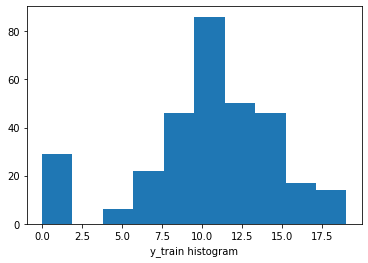

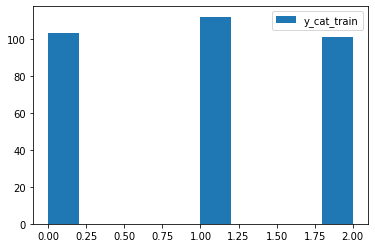

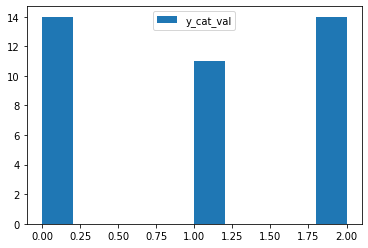

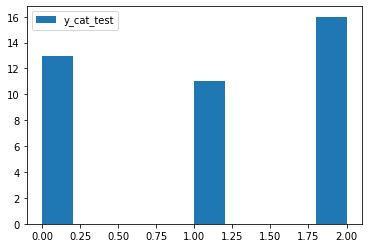

In [ ]:
# implement your solution BELOW
def create_three_classes_from_regression_labels(y_train, y_val, y_test ):
  FIRST_LIM = 10
  SECOND_LIM = 12.5

  print("1/3 of len(y_train): " + str(len(y_train) * (1/3)))
  fig, ax = plt.subplots()
  ax.hist(y_train)
  ax.set_xlabel("y_train histogram")
  fig.show()

  y_cat_train = np.zeros((y_train.shape))
  y_cat_val = np.zeros((y_val.shape))
  y_cat_test  = np.zeros((y_test .shape))

  y_cat_train = np.add(y_cat_train, np.logical_and((y_train >= FIRST_LIM),  (y_train <= SECOND_LIM)))
  y_cat_train = np.add(y_cat_train, (y_train > SECOND_LIM)*2)

  y_cat_val = np.add(y_cat_val, np.logical_and((y_val >= FIRST_LIM),  (y_val <= SECOND_LIM)))
  y_cat_val = np.add(y_cat_val, (y_val > SECOND_LIM)*2)

  y_cat_test = np.add(y_cat_test, np.logical_and((y_test >= FIRST_LIM),  (y_test <= SECOND_LIM)))
  y_cat_test = np.add(y_cat_test, (y_test > SECOND_LIM)*2)
  return y_cat_train, y_cat_val, y_cat_test

y_cat_train, y_cat_val, y_cat_test = create_three_classes_from_regression_labels(y_train, y_val, y_test)

fig, ax = plt.subplots()
ax.hist(y_cat_train, label = "y_cat_train")
ax.legend()
fig.show()

fig, ax = plt.subplots()
ax.hist(y_cat_val, label = "y_cat_val")
ax.legend()
fig.show()

fig, ax = plt.subplots()
ax.hist(y_cat_test, label = "y_cat_test")
ax.legend()
fig.show()

# implement your solution ABOVE

tester.test('cl_dataset', y_cat_train, y_cat_val, y_cat_test)

## **G**: Kategóriacímkék átalakítása one-hot kódolásra

Kettőnél több kategóriás (multi-class) klasszifikációnál minden kategóriához egy valószínűséget becslünk, azaz a háló kimenete akkora méretű, ahány kategóriánk van. Így tehát az igazi címkéink ugyanekkora méretű one-hot kódolású vektorok lesznek, ezeket címkevektorokként használva fogjuk betanítani a hálót.

Készítsd el a one-hot kódolású címkevektor tömböket a kategóriacímkéket tartalmazó `y_cat_train`, `y_cat_val`, `y_cat_test` tömbökből! Az új tömbök kerüljenek a `y_onehot_train`, `y_onehot_val`, `y_onehot_test` változókba! A tömbök alakja így (n_samples, n_categories), típusuk legyen `np.float32`!


In [ ]:
# implement your solution BELOW
def make_on_hot_from_labels(y_cat_train, y_cat_val, y_cat_test ):
  DEPTH = 3

  y_onehot_train = tf.one_hot(y_cat_train, depth = DEPTH)
  y_onehot_train = np.array(y_onehot_train, dtype=np.float32)

  y_onehot_val = tf.one_hot(y_cat_val, depth = DEPTH)
  y_onehot_val = np.array(y_onehot_val, dtype=np.float32)

  y_onehot_test  = tf.one_hot(y_cat_test , depth = DEPTH)
  y_onehot_test  = np.array(y_onehot_test , dtype=np.float32)
  return y_onehot_train, y_onehot_val, y_onehot_test

y_onehot_train, y_onehot_val, y_onehot_test = make_on_hot_from_labels(y_cat_train, y_cat_val, y_cat_test )
# implement your solution ABOVE

tester.test('cl_onehot', y_onehot_train, y_onehot_val, y_onehot_test)

Tester: One-hot conversion OK


## **H**: A klasszifikációs neuronháló definiálása Keras-ban 

Használd a `keras.models.Sequential()` osztályt a háló definiálásához! A háló architektúráját az alábbiak alapján alakítsd ki:
- **H/1**: Kétrétegű háló, az első réteg neuronjainak száma 50, aktivációs függvénye ReLU. Az első réteg után alkalmazz dropout-ot neurononként 30%-os valószínűséggel!
- **H/2**: Négyrétegű háló, a neuronok száma rendre 20, 20, 10, aktivációs függvényük ReLU. Az egyes rétegek közé tégy dropout rétegeket, melyek 20%-os valószínűséggel nulláznak ki egy-egy elemet!
- **H/3**: Háromrétegű háló, a neuronok száma rendre 50, 30. Aktivációs függvényként használj sorban tanh-t, majd ReLU-t!

Minden esetben csak teljesen összekötött (dense) rétegeket, valamint dropout rétegeket kell használnod. Az aktivációs függvényeket a telejesen összekötött rétegek `activation` paramétereként add meg (azaz most ne használj külön Acitvation rétegeket). A rétegek számába beleértendő a kimenetre képző, utolsó réteg is, melynek méretét a címke mérete határozza meg. Alkalmazd a tanult aktivációs függvényt az utolsó rétegen, függően a feladat típusától!
A modellt fordítsd le a `compile()` függvény segítségével: a költségfüggvény legyen a szokásos, multi-class klasszifikációhoz használatos (categorical) crossentropy, optimizer algoritmusként pedig alkalmazd az SGD algoritmust megfelelő tanulási rátával! 
A klasszifikációs neuronhálót tartalmazó keras.models.Sequential() típusú változót nevezd el `cl_model`-nek. 

In [ ]:
# implement your solution BELOW
def create_classification_model():
  my_model = tf.keras.models.Sequential()
  my_model.add(tf.keras.layers.Dense(50, activation='tanh', input_dim=x_train.shape[1] ) )
  my_model.add(tf.keras.layers.Dropout(0.3))
  my_model.add(tf.keras.layers.Dense(30, activation='relu'))
  my_model.add(tf.keras.layers.Dropout(0.3))
  my_model.add(tf.keras.layers.Dense(3, activation='softmax'))

  my_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(0.01) , 
                  metrics=['accuracy'] )
  return my_model


cl_model = create_classification_model()
cl_model.summary()
# implement your solution ABOVE

#tester.test('cl_model_architecture', cl_model)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 50)                1550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 93        
Total params: 3,173
Trainable params: 3,173
Non-trainable params: 0
_________________________________________________________________


## **I**: A háló betanítása (multi-class) klasszifikációs feladatra

Tanítsd be a neuronhálót a tanítóhalmazon! Használj early stopping-ot a validációs halmazzal! A tanulási rátát, epoch-ok maximális számát, a batch méretet, az early stopping `patience` paraméterét szabadon átállíthatod. Próbálgathatsz különböző kombinációkat, hogy jobb eredményt érj el.

- Rajzold ki, hogyan alakult a tanulási és validációs költség a betanítás során! Ehhez használhatod a `matplotlib` könyvtárat, példát találsz a 8. előadás notebookjában. 
- A crossentropy költség mellett, a helyesen klasszifikált mintaelemek arányának (accuracy) tanító- és validációs halmazon történő alakulását is rajzold ki egy másik grafikonon! A grafikonok y tengelyének megjelenített értékhatárait úgy állítsd be, hogy mindegyik idősor látható legyen és könnyen ki lehessen venni a költségek alakulását a tanítás vége felé is!
- Számold ki a betanított modell crossentropy költségét és az accuracy-t a teszthalamzon, majd add értékül ezeket az értékeket a `test_ce` és `test_acc` változóknak!
- Számold ki az F1-score-t a teszthalmazon, majd add értékül ezt az értéket a `test_f1` változónak! Az F1-score a precision és recall értékek harmonikus közepe, azaz az alábbi módon számolható:

$$ F_1 = 2 \cdot \frac{\textrm{precision} \cdot \textrm{recall}}{\textrm{precision} + \textrm{recall}} $$

Az F1-score tökéletes klasszifikáció esetén 1, tökéletesen hibás klasszifikáció esetén pedig 0, hasonlóan az accuracy metrikához. Az F1-score előnye, hogy robusztus, nehéz "megtéveszteni", ha magas értéket ad, a modell nagy valószínűséggel tényleg jól működik.
Az F1-score definíciójában a precision és recall függvények azonosak az 1. házi feladat B) részében megvalósított multi-class feladatokat is kezelő függvényeivel. Természetesen az input formátumára figyelni kell (hogy valószínűségekként, vagy kategorikus címkékként adjuk be a becsléseket és igazi címkéket).

In [ ]:
print(str(x_train.shape) + "  x_train")
print(str(y_onehot_train.shape) + "  y_train")
print(str(x_val.shape) + "  x_val")
print(str(y_onehot_val.shape) + "  y_val")

(197, 30)  x_train
(197, 3)  y_train
(98, 30)  x_val
(98, 3)  y_val


In [ ]:
# implement your solution BELOW
early_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, mode="auto")
history = cl_model.fit(x=x_train, y=y_onehot_train, validation_data=(x_val, y_onehot_val), epochs=500, verbose = 2,
              batch_size=16, callbacks=[early_callback] )

fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend()
fig.show()

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.legend()
fig.show()

y_pred_onehot_test = cl_model.predict(x_test)
e_history = cl_model.evaluate(x_test, y_onehot_test, return_dict=True)

test_ce = e_history['loss']
test_acc = e_history['accuracy']

test_precision = precision_score( np.argmax(y_onehot_test, axis=1), np.argmax(y_pred_onehot_test, axis=1), average='macro')
test_recall = recall_score( np.argmax(y_onehot_test, axis=1), np.argmax(y_pred_onehot_test, axis=1), average='macro')
test_f1 = 2* (test_precision*test_recall) / (test_precision+test_recall)

print("f1_test: " + str(test_f1))

# implement your solution ABOVE

tester.test('cl_model_learning', test_ce, test_acc, test_f1)
tester.print_all_tests_successful()

Epoch 1/500
20/20 - 1s - loss: 1.1839 - accuracy: 0.3513 - val_loss: 1.1222 - val_accuracy: 0.4103
Epoch 2/500
20/20 - 0s - loss: 1.1482 - accuracy: 0.3766 - val_loss: 1.1133 - val_accuracy: 0.4103
Epoch 3/500
20/20 - 0s - loss: 1.1488 - accuracy: 0.3386 - val_loss: 1.1103 - val_accuracy: 0.3590
Epoch 4/500
20/20 - 0s - loss: 1.0983 - accuracy: 0.4051 - val_loss: 1.1060 - val_accuracy: 0.3590
Epoch 5/500
20/20 - 0s - loss: 1.1113 - accuracy: 0.3924 - val_loss: 1.1058 - val_accuracy: 0.3590
Epoch 6/500
20/20 - 0s - loss: 1.0989 - accuracy: 0.3797 - val_loss: 1.1028 - val_accuracy: 0.3846
Epoch 7/500
20/20 - 0s - loss: 1.1077 - accuracy: 0.3861 - val_loss: 1.1008 - val_accuracy: 0.3846
Epoch 8/500
20/20 - 0s - loss: 1.0888 - accuracy: 0.3892 - val_loss: 1.0972 - val_accuracy: 0.4103
Epoch 9/500
20/20 - 0s - loss: 1.0883 - accuracy: 0.3703 - val_loss: 1.1017 - val_accuracy: 0.4103
Epoch 10/500
20/20 - 0s - loss: 1.1159 - accuracy: 0.3671 - val_loss: 1.0973 - val_accuracy: 0.3846
Epoch 11/